# Data Pre-Processing

Melakukan sanity check terhadap dataset dengan mengecek missing value dan data duplikat. Pengecekan menunjukkan bahwa tidak terdapat data yang kosong maupun duplikat dalam dataset, sehingga tidak diperlukan proses data handling lanjutan pada tahap ini.

Namun, kolom 'Location' di-remove menggunakan df.drop() karena lokasi dianggap tidak berpengaruh dalam klasifikasi cuaca.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive\weather_classification_data.csv")

In [ ]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
# Mengecek jumlah missing value di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan kolom yang memiliki missing value
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Remove kolom Location

df = df.drop('Location', axis=1)

In [ ]:
# After remove kolom

df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,Rainy


# Encoding Data

Untuk kolom kategorikal seperti Cloud cover, Season, dan Weather Type, perlu dilakukan encoding terlebih dahulu. Encoding dilakukan untuk mengubah setiap variabel unik menjadi numerik agar lebih akurat ketika dibaca oleh model.

Kolom Cloud cover dan Season di-encode menggunakan Ordinal Encoder, sedangkan kolom Weather Type di-encode menggunakan Label Encoder yang lebih cocok untuk kolom target.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode kolom Weather Type
le = LabelEncoder()
df["Weather Encoded"] = le.fit_transform(df["Weather Type"])

In [ ]:
# Print hasil encoding
df["Weather Encoded"].head()

0    1
1    0
2    3
3    3
4    1
Name: Weather Encoded, dtype: int32

In [ ]:
# Mendefinisikan kolom target menggunakan hasil encoding tadi
y = df["Weather Encoded"]

In [ ]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Weather Type,Weather Encoded
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,Rainy,1
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,Cloudy,0
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,Sunny,3
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,Sunny,3
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,Rainy,1


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Mendefinisikan kolom fitur (seluruh kolom kecuali Weather Type yang menjadi target)
X = df.drop(["Weather Type", "Weather Encoded"], axis=1).copy()

# Menentukan kolom kategorikal yang perlu diencoding
cat_cols = ['Cloud Cover', 'Season']
encoder = OrdinalEncoder()

# Melakukan encoding dan menggantikan kolom aslinya dengan hasil encoding
X[cat_cols] = encoder.fit_transform(X[cat_cols])

In [ ]:
# Cek kolom fitur
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km)
0,14.0,73,9.5,82.0,3.0,1010.82,2,3.0,3.5
1,39.0,96,8.5,71.0,3.0,1011.43,7,1.0,10.0
2,30.0,64,7.0,16.0,0.0,1018.72,5,1.0,5.5
3,38.0,83,1.5,82.0,0.0,1026.25,7,1.0,1.0
4,27.0,74,17.0,66.0,2.0,990.67,1,3.0,2.5


# Menjalankan Model

Model yang dipilih adalah Random Forest Classifier yang di-import dari library Scikit-Learn. Sebelum men-train dan menguji model, kita akan melakukan splitting data terlebih dahulu.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Melakukan data splitting dengan perbandingan 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17, test_size=0.3)

In [ ]:
# Memanggil Random Forest classifier
rf = RandomForestClassifier()

In [ ]:
# Melakukan training menggunakan data train (X_train dan y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Menguji model dengan prediksi hasil data uji (X_test)
y_pred = rf.predict(X_test)

In [ ]:
# Evaluasi akurasi
rf.score(X_test, y_test)

0.9169191919191919

# Hasil Model Klasifikasi

Setelah proses training dan pengujian model selesai dilakukan, langkah selanjutnya adalah melakukan evaluasi performa model. Evaluasi ini dilakukan menggunakan library classification_report dari sklearn.metrics, yang memberikan informasi detail terkait metrik evaluasi seperti precision, recall, f1-score, dan akurasi dari hasil prediksi model.

Selain itu, untuk mengetahui seberapa besar pengaruh masing-masing fitur terhadap prediksi yang dihasilkan, dilakukan juga analisis terhadap feature importance dari model Random Forest. Hal ini membantu untuk mengidentifikasi fitur mana yang paling berkontribusi dalam menentukan jenis cuaca.

Penjelasan singkat metrik:
1. Precision = proporsi prediksi benar untuk suatu kelas dibandingkan dengan seluruh prediksi yang dibuat untuk kelas tersebut.
2. Recall = proporsi data aktual dari suatu kelas yang berhasil diprediksi dengan benar oleh model.
3. F1-score = Gabungan dari precision dan recall, yang memberikan gambaran menyeluruh tentang keseimbangan antara keduanya.
4. Support = Mengindikasikan jumlah data aktual pada masing-masing kelas



In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Melihat metrik evaluasi model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       977
           1       0.90      0.92      0.91       971
           2       0.94      0.93      0.93       983
           3       0.94      0.91      0.93      1029

    accuracy                           0.92      3960
   macro avg       0.92      0.92      0.92      3960
weighted avg       0.92      0.92      0.92      3960



In [ ]:
# Menghitung feature importances
features = pd.DataFrame(rf.feature_importances_, index= X.columns)

In [ ]:
# Melihat fitur mana yang paling berpengaruh
features.head(10)

,0
Temperature,0.219222
Humidity,0.056049
Wind Speed,0.032983
Precipitation (%),0.136988
Cloud Cover,0.086930
Atmospheric Pressure,0.104985
UV Index,0.152336
Season,0.044110
Visibility (km),0.166397


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

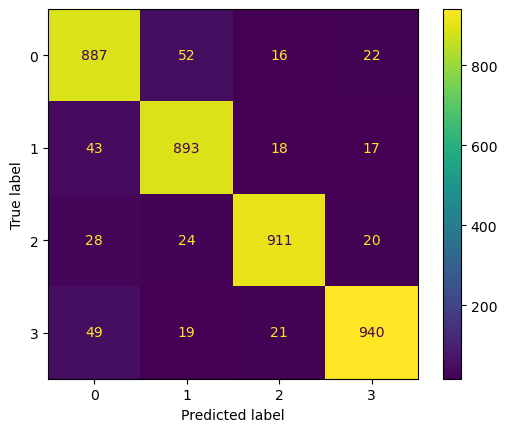

In [ ]:
# Melihat kelas mana yang sering salah prediksi dan mengenali ketidakseimbangan data (class imbalance)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Membandingkan dengan Model Lain

Program klasifikasi yang semula menggunakan Random Forest akan dibandingkan dengan SVM, KNN, dan Logistic Regression.

Untuk melihat model mana yang paling baik.

Disini kita perlu sedikit melakukan penyesuaian pada LogisticRegression dan KNN karena dataset pada program ini mengandung fitur dengan skala berbeda. Biasanya Logistic Regression dan KNN bekerja lebih baik jika fitur sudah dinormalisasi, tetapi karena pada program ini memakai Random Forest sebagai baseline yang robust terhadap skala, kita akan melakukan normalisasi data fitur (standarisasi) terlebih dahulu untuk metode Logistic Regression dan KNN.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Import library untuk membandingkan dengan 3 model sekaligus
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  Normalisasi data fitur untuk perbandingan dengan metode Logistic Regression dan KNN

from sklearn.preprocessing import StandardScaler

# Lakukan standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model yang butuh scaling
models_scaled = {
    'KNN (scaled)': KNeighborsClassifier(),
    'LogReg (scaled)': LogisticRegression(max_iter=1000)
}

for name, model in models_scaled.items():
    model.fit(X_train_scaled, y_train)
    acc = model.score(X_test_scaled, y_test)
    print(f"{name} Accuracy: {acc:.3f}")


KNN (scaled) Accuracy: 0.907
LogReg (scaled) Accuracy: 0.858


In [ ]:
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'LogReg': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{name} Accuracy: {acc:.3f}")

KNN Accuracy: 0.895
SVM Accuracy: 0.826
LogReg Accuracy: 0.860


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Membuat visualisasi dari program untuk mendapatkan insight

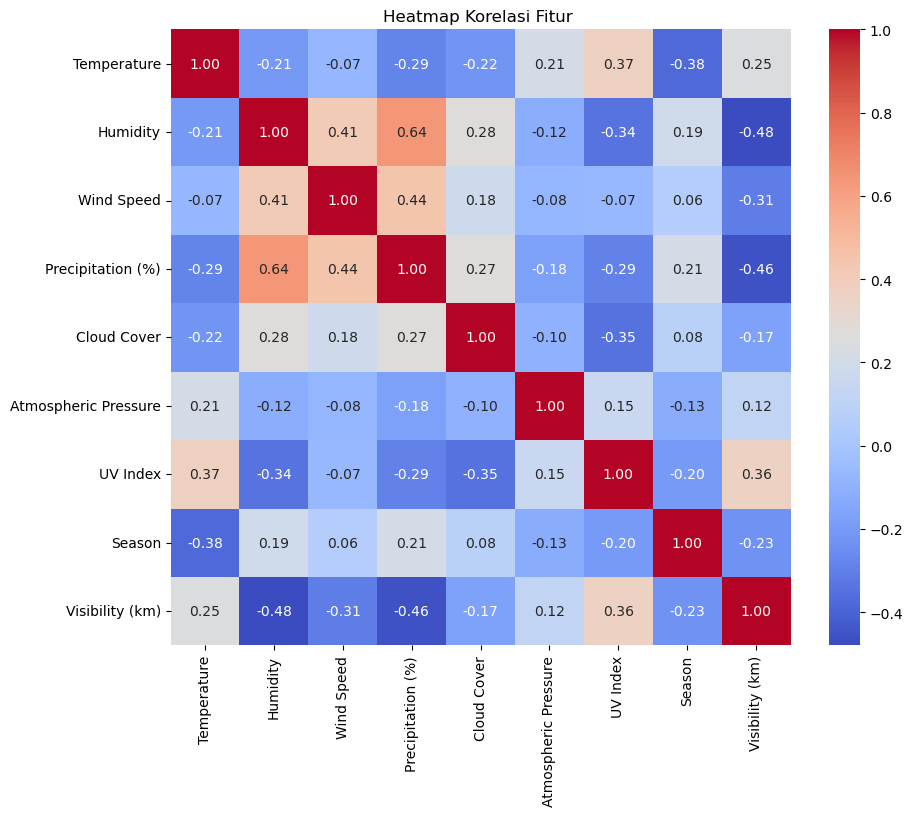

In [ ]:
# Visualisasi korelasi antar fitur
plt.figure(figsize=(10,8))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur ")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3284\2701713866.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='pastel')


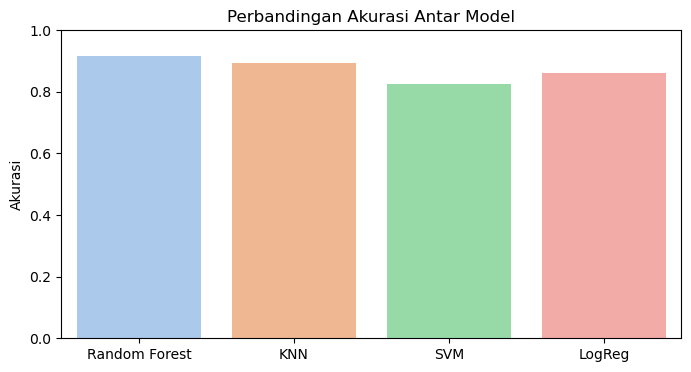

In [ ]:
# Visualisasi perbandingan akurasi antar model
model_names = ['Random Forest', 'KNN', 'SVM', 'LogReg']
accuracies = [rf.score(X_test, y_test), 0.895, 0.826, 0.860]

plt.figure(figsize=(8,4))
sns.barplot(x=model_names, y=accuracies, palette='pastel')
plt.title("Perbandingan Akurasi Antar Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.show()